# week 2 part 2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# read data
df = pd.read_csv("base_unida.csv")

# Drop rows where all specified columns are NaN
df = df.dropna(subset=["Estrato", "Profundidad", "temperatura", "salinidad", "oxigeno", "pH"], how="all")

# Categorical ordering
orden_estratos = ["Abisal superior", "Batial  medio", "Batial inferior", "Batial superior"]
df["Estrato"] = pd.Categorical(df["Estrato"], categories=orden_estratos, ordered=True)

# Set theme
sns.set_theme(context="notebook", style="whitegrid", font_scale=1.1)  
 
palette = sns.color_palette("deep")


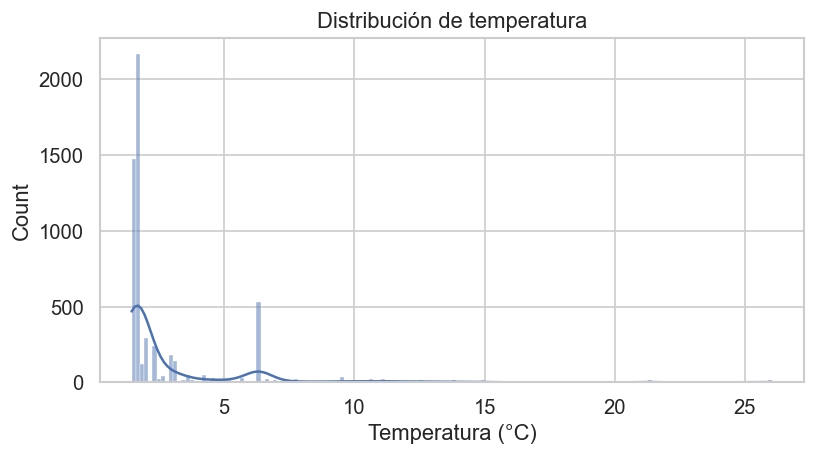

<Figure size 640x480 with 0 Axes>

In [ ]:
# temperature distribution 
plt.figure(figsize=(7, 4), dpi=120)   #its here
sns.histplot(df["temperatura"], kde=True, color=palette[0])
plt.title("Distribución de temperatura")
plt.xlabel("Temperatura (°C)")
plt.tight_layout()
plt.show()

# save figure
plt.savefig("fig_temperatura.png", dpi=300, bbox_inches="tight")


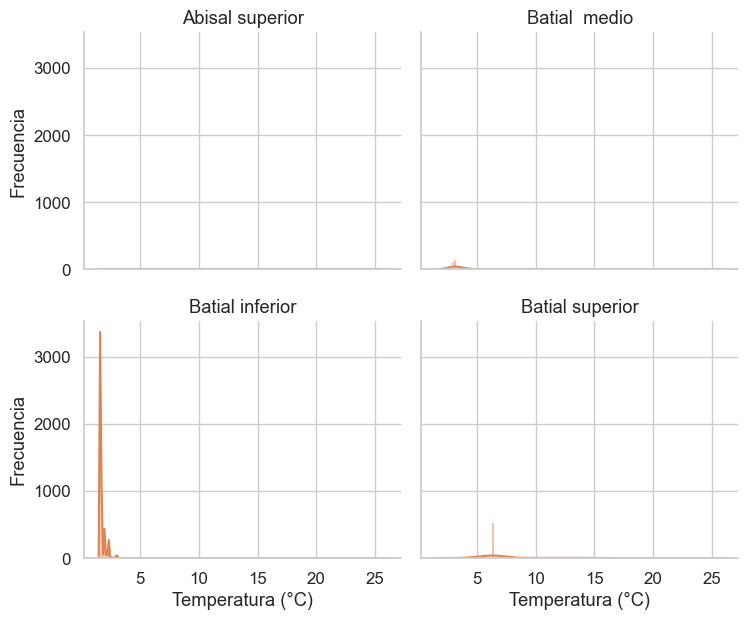

In [ ]:
# temperature distribution by stratum
g = sns.displot(
    data=df, x="temperatura", col="Estrato",
    kind="hist", kde=True, col_wrap=2, height=3.2, aspect=1.2, color=palette[1]
)
g.set_axis_labels("Temperatura (°C)", "Frecuencia")
g.set_titles("{col_name}")
plt.tight_layout()
plt.savefig("dist_temperatura_por_estrato.png", dpi=300, bbox_inches="tight")


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8964\3528108004.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


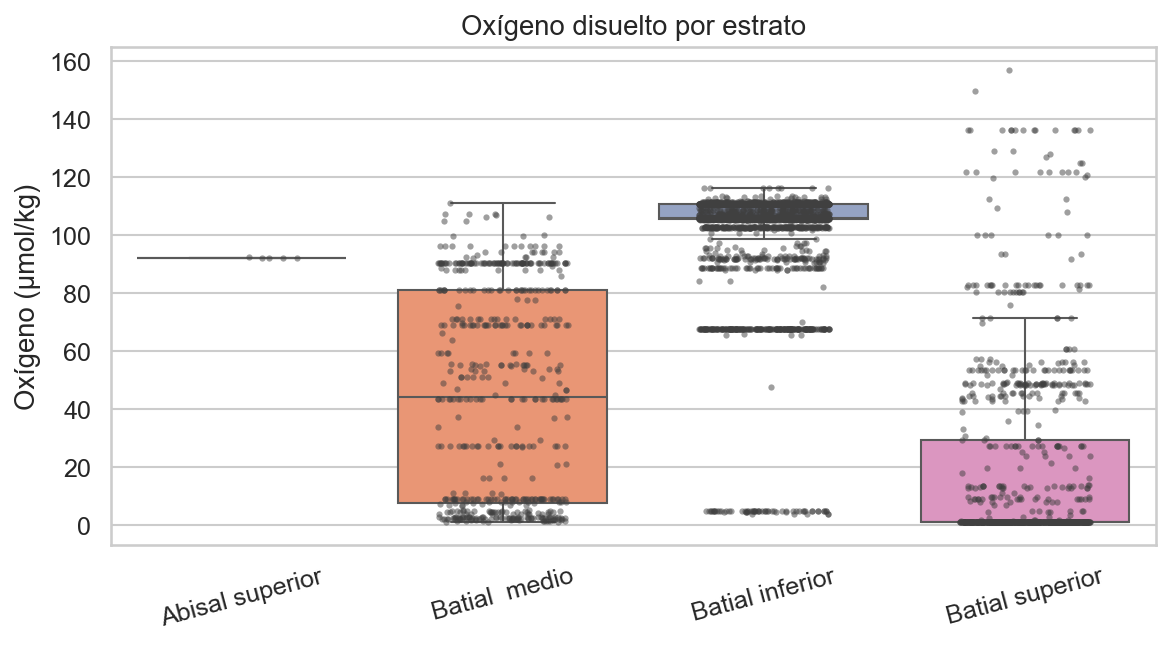

In [ ]:
# Box and swarm plot of oxygen by stratum
plt.figure(figsize=(8, 4.5), dpi=150)
ax = sns.boxplot(
    data=df, x="Estrato", y="oxigeno", order=orden_estratos, palette="Set2",
    showfliers=False
)
sns.stripplot(
    data=df, x="Estrato", y="oxigeno", order=orden_estratos,
    size=3, alpha=0.5, color=".25", jitter=0.25
)
ax.set_xlabel("")
ax.set_ylabel("Oxígeno (µmol/kg)")
ax.set_title("Oxígeno disuelto por estrato")
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("box_swarm_oxigeno_estrato.png", dpi=300, bbox_inches="tight")
plt.show()

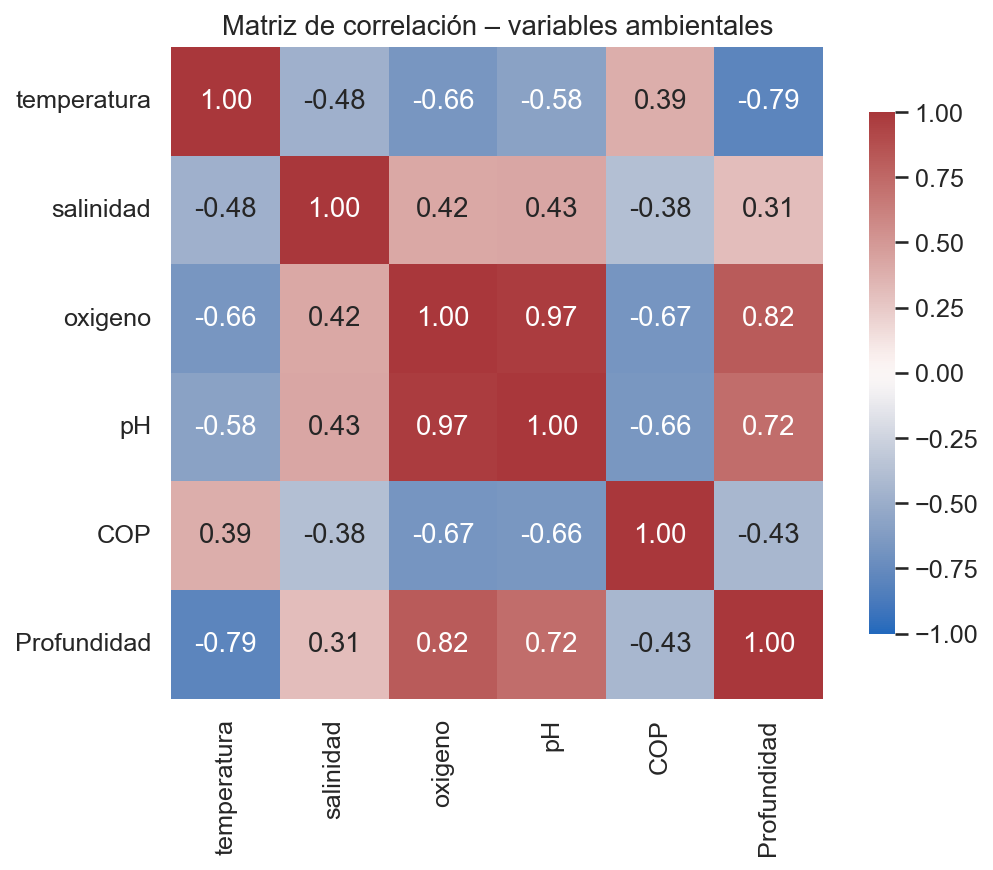

In [ ]:
# Correlation heatmap
vars_env = ["temperatura", "salinidad", "oxigeno", "pH", "COP", "Profundidad"]
corr = df[vars_env].corr(numeric_only=True)

plt.figure(figsize=(7.5, 6), dpi=150)
ax = sns.heatmap(
    corr, annot=True, fmt=".2f", cmap="vlag",
    vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .8}
)
ax.set_title("Matriz de correlación – variables ambientales")
plt.tight_layout()
plt.savefig("heatmap_correlacion.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8964\2246637489.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=occs, x="Estrato", y="ocurrencias", palette="colorblind")


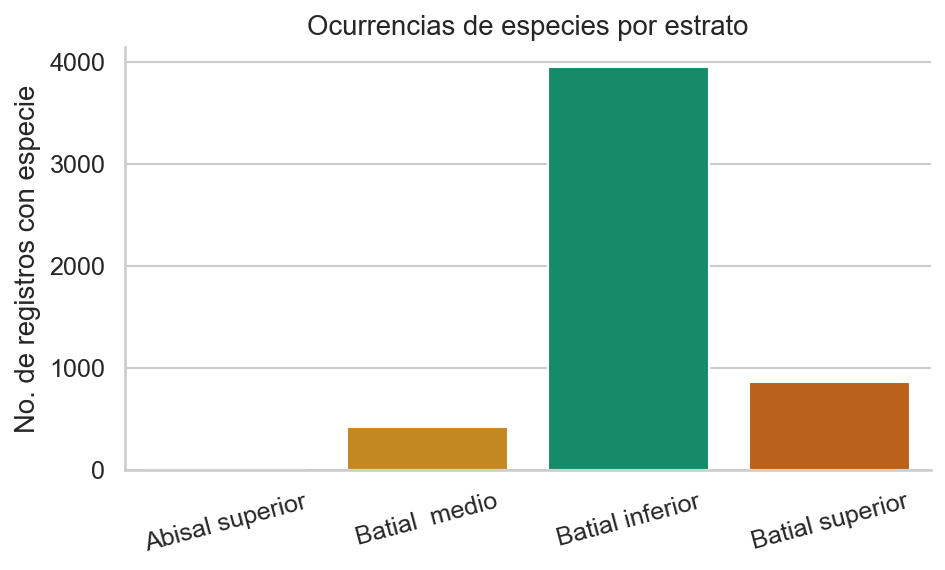

In [ ]:
# Bar plot of occurrences by stratum
occs = (
    df.assign(tiene_especie=df["Especies"].notna())
      .groupby("Estrato", observed=True)["tiene_especie"]
      .sum().reindex(orden_estratos)
      .reset_index(name="ocurrencias")
)

plt.figure(figsize=(6.5, 4), dpi=150)
ax = sns.barplot(data=occs, x="Estrato", y="ocurrencias", palette="colorblind")
sns.despine()
ax.set_xlabel("")
ax.set_ylabel("No. de registros con especie")
ax.set_title("Ocurrencias de especies por estrato")
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("barras_ocurrencias_estrato.png", dpi=300, bbox_inches="tight")
plt.show()